In [23]:
%matplotlib inline
import os
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [61]:
def images_list(image_directory):
    image_list = [image_directory+f for f in os.listdir(image_directory) if re.search('jpg|JPG', f)]
    return image_list

def create_graph():
    # Creates a tensor graph in the specified directory
    model_dir = 'imagenet'
    with gfile.FastGFile(os.path.join(model_dir,
                    'classify_image_graph_def.pb'), 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

def extraction(list_images):
    """
    Take a list of image file paths, and return features.
    """
    nb_features = 2048
    features = np.empty((len(list_images),nb_features))
    labels = []

    create_graph()

    with tf.Session() as sess:

        next_to_last_tensor = sess.graph.get_tensor_by_name('pool_3:0')

    for ind, image in enumerate(list_images):
        if (ind%100 == 0):
            print('Processing %s...' % (image))
        if not gfile.Exists(image):
            tf.logging.fatal('File does not exist %s', image)

    image_data = gfile.FastGFile(image, 'rb').read()

    predictions = sess.run(next_to_last_tensor,
                        {'DecodeJpeg/contents:0': image_data})

    features[ind,:] = np.squeeze(predictions)
    
    labels.append(re.split('_\d+',image.split('/')[1])[0])

    return features, labels


In [47]:
image_list = images_list('Capstone_photo/Random/')

In [49]:
random_images = extraction(image_list)

Processing Capstone_photo/Random/IMG_9071.JPG...


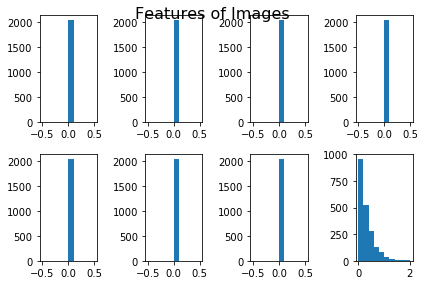

In [55]:
x = np.arange(1,2048)
fig, axes = plt.subplots(2,4)

for ax, i in zip(axes.flatten(),range(len(random_images))):
    ax.hist(random_images[i])

plt.suptitle('Features of Images',fontsize=16)
plt.tight_layout()

In [62]:
kickflip = images_list('Capstone_photo/Kickflip/')

In [64]:
feature, label = extraction(kickflip)

Processing Capstone_photo/Kickflip/IMG_1816.jpg...
Processing Capstone_photo/Kickflip/IMG_1918.jpg...
Processing Capstone_photo/Kickflip/IMG_2117.jpg...
Processing Capstone_photo/Kickflip/IMG_9145.jpg...
Processing Capstone_photo/Kickflip/IMG_9247.jpg...
Processing Capstone_photo/Kickflip/IMG_9444.jpg...


In [67]:
label

['Kickflip']

In [69]:
kick_label = label * 2048